In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [60]:
city = pd.read_csv('data/cities_by_day.csv')

In [61]:
city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [62]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [70]:
city.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [91]:
city.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
C6H6          float64
C7H8          float64
C8H10         float64
AQI           float64
AQI_Bucket     object
dtype: object

We have 3 object and 13 float variables
Here the noticable thing is Date is of datetime and AQI_Bucket is of category

In [93]:
city['Date'] = pd.to_datetime(city['Date'])
city['AQI_Bucket'] = city['AQI_Bucket'].astype('category')

In [94]:
city.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
C6H6                 float64
C7H8                 float64
C8H10                float64
AQI                  float64
AQI_Bucket          category
dtype: object

In [95]:
city.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [96]:
import missingno as msno

#### Visualizing null values in each column

<AxesSubplot:>

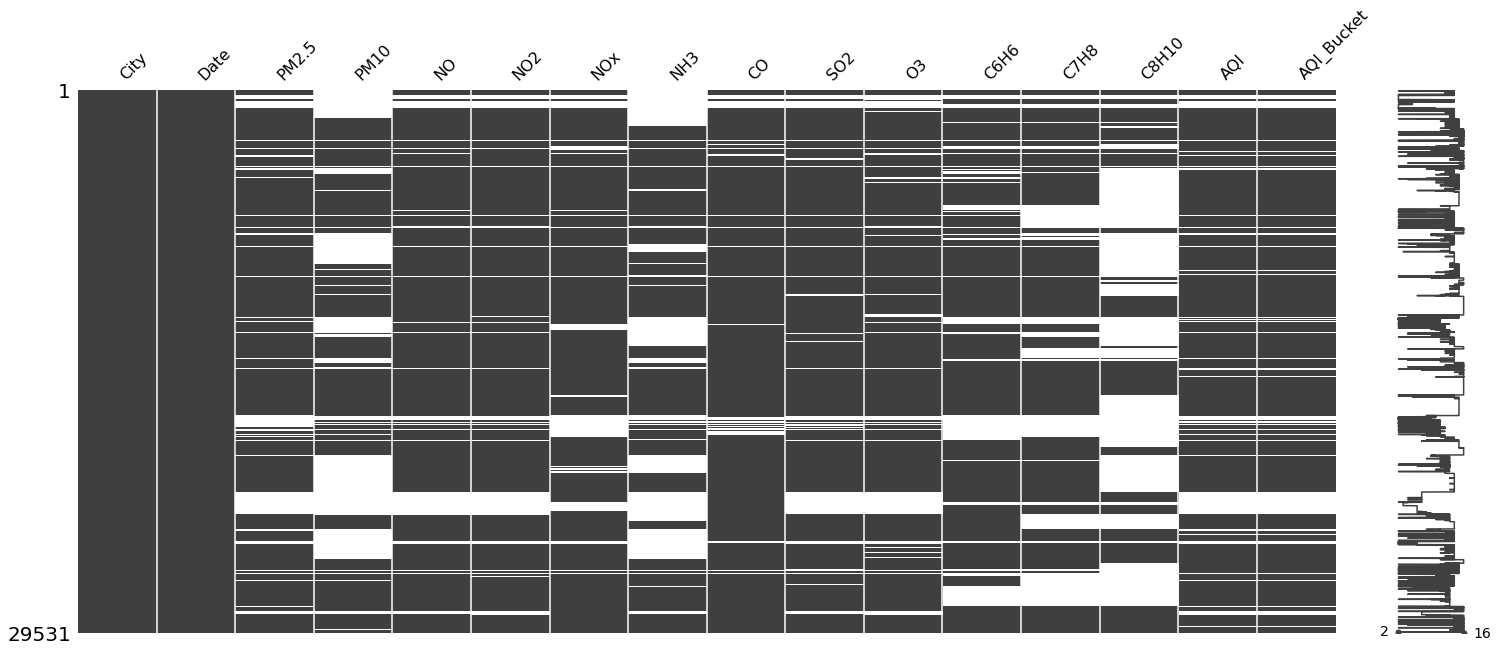

In [97]:
msno.matrix(city)

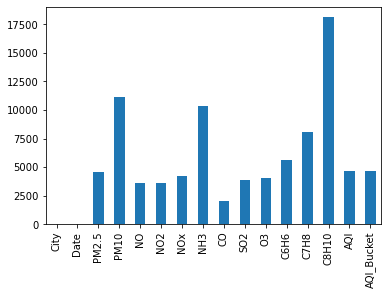

In [99]:
# C8H10 has maximum null values
city.isna().sum().plot(kind='bar')
plt.show()

In [100]:
city.AQI_Bucket.unique()

[NaN, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good']
Categories (6, object): ['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good']

In [113]:
# filling NaN values with mean values
city.fillna(city.mean(), inplace=True)

In [114]:
# Null values in every city
city.AQI.isnull().groupby(city['City']).sum().sort_values(ascending=False)

City
Visakhapatnam         0
Thiruvananthapuram    0
Aizawl                0
Amaravati             0
Amritsar              0
Bengaluru             0
Bhopal                0
Brajrajnagar          0
Chandigarh            0
Chennai               0
Coimbatore            0
Delhi                 0
Ernakulam             0
Gurugram              0
Guwahati              0
Hyderabad             0
Jaipur                0
Jorapokhar            0
Kochi                 0
Kolkata               0
Lucknow               0
Mumbai                0
Patna                 0
Shillong              0
Talcher               0
Ahmedabad             0
Name: AQI, dtype: int64

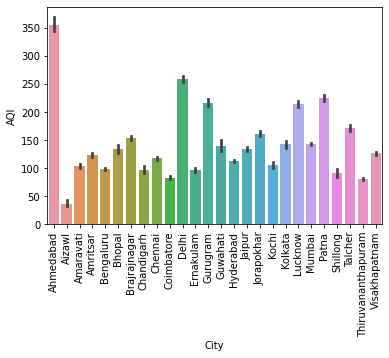

In [115]:
# Air quality index in each city
# AQI of Ahemdabad has wrong observations 
sns.barplot(x='City', y='AQI', data=city)
plt.xticks(rotation=90);

#### Top 10 most Polluted Cities
Here Ahmedabad is the outlier

In [116]:
city.groupby('City').AQI.mean().sort_values(ascending=False)[:10]

City
Ahmedabad       356.144807
Delhi           259.024707
Patna           224.822373
Gurugram        217.227975
Lucknow         214.998893
Talcher         171.310522
Jorapokhar      161.707019
Brajrajnagar    154.162373
Mumbai          142.889029
Kolkata         142.475203
Name: AQI, dtype: float64

#### Most of the records have moderate and Satisfactory Air Quality Index

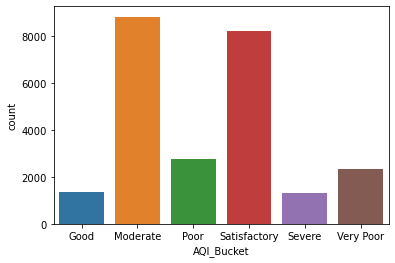

In [117]:
sns.countplot(x='AQI_Bucket', data=city)
plt.show()

<AxesSubplot:>

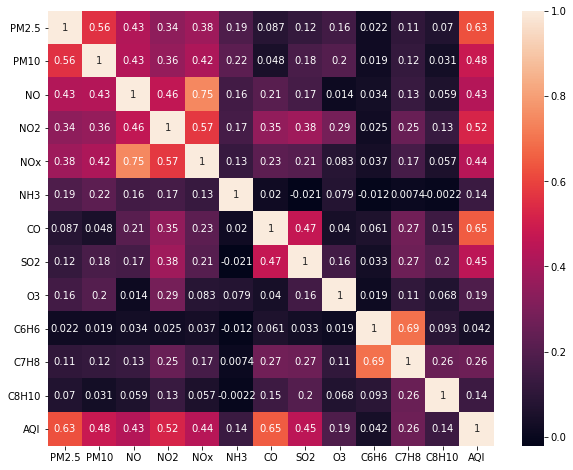

In [126]:
plt.figure(figsize=(10,8))
sns.heatmap(city.corr(), annot=True)

PM2.5 and CO has a strong correlation with AQI